In [1]:
# Mega Case Study - Make a Hybrid Deep Learning Model

# Part 1 - Identify the Frauds with the Self-Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data from http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
# Importing the dataset
!curl https://raw.githubusercontent.com/muke888/UdemyDeepLearning/master/4.%20Self%20Organising%20Maps/Credit_Card_Applications.csv -o Credit_Card_Applications.csv
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.info()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35641  100 35641    0     0  84859      0 --:--:-- --:--:-- --:--:-- 84657
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


In [2]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
# Dividing into dependent (y) and independent (x) variables

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X[0]

array([1.5776156e+07, 1.0000000e+00, 2.2080000e+01, 1.1460000e+01,
       2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.5850000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       2.0000000e+00, 1.0000000e+02, 1.2130000e+03])

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X[0]

array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ])

In [5]:
!pip install MiniSom

In [0]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 500)

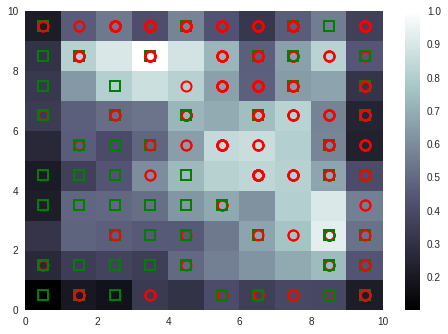

In [7]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] # circle & square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, #x-coordinate of winning node +0.5
         w[1] + 0.5, #y-coordinate of winning node +0.5
         markers[y[i]], # if customer got approval (1), square
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [0]:
# Finding potential frauds at highest likely spots of (2,4) & (7,4)
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,8)], mappings[(8,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [0]:
# Part 2 - Going from Unsupervised to Supervised Deep Learning

# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds: #if customer ID in {frauds}
        is_fraud[i] = 1


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [13]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)

Epoch 1/5
690/690 [==============================] - 1s 2ms/step - loss: 0.4615 - acc: 0.9623
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1765 - acc: 0.9623
Epoch 3/5
690/690 [==============================] - 1s 993us/step - loss: 0.1283 - acc: 0.9623
Epoch 4/5
690/690 [==============================] - 1s 980us/step - loss: 0.1119 - acc: 0.9623
Epoch 5/5
690/690 [==============================] - 1s 973us/step - loss: 0.1022 - acc: 0.9623


In [0]:
# Predicting the probabilities of frauds(predicting the probability that the label is 1)

y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1) # adding customerID and predict probabilities, 2d arrays
y_pred = y_pred[y_pred[:, 1].argsort()] # sort by predicted probabilities

In [16]:
np.set_printoptions(suppress=True)
y_pred

array([[15621423.        ,        0.00000793],
       [15799785.        ,        0.00005704],
       [15642098.        ,        0.00074828],
       ...,
       [15673907.        ,        0.328242  ],
       [15642336.        ,        0.328242  ],
       [15593345.        ,        0.328242  ]])